# **STACKED CHART**

#### IMPORT REQUIRED LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

---

CONNECT TO DATABASE AND LOAD DATASET

In [3]:
conn = sqlite3.connect('my_analysis.db')

query = "SELECT * FROM main"
df = pd.read_sql_query(query, conn)

df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,None,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,None,None,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",None,Apples,None,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",None,Apples,None,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


---

#### STACKED CHART FOR COMPOSITION OF JOB SATISFACTION ACROSS AGE GROUPS

In [18]:
# Fix Age column
age_map = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5, 
    '35-44 years old': 39.5, 
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 65
}
age_order = ['Under 18 years old','18-24 years old','25-34 years old',
             '35-44 years old', '45-54 years old','55-64 years old',
             '65 years or older']

# Convert Age column to categorical
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

# Create numerical age column
df['Num_Age'] = df['Age'].map(age_map)

df[['Age', 'Num_Age']].head()

,Age,Num_Age
0,Under 18 years old,17.0
1,35-44 years old,39.5
2,45-54 years old,49.5
3,18-24 years old,21.0
4,18-24 years old,21.0


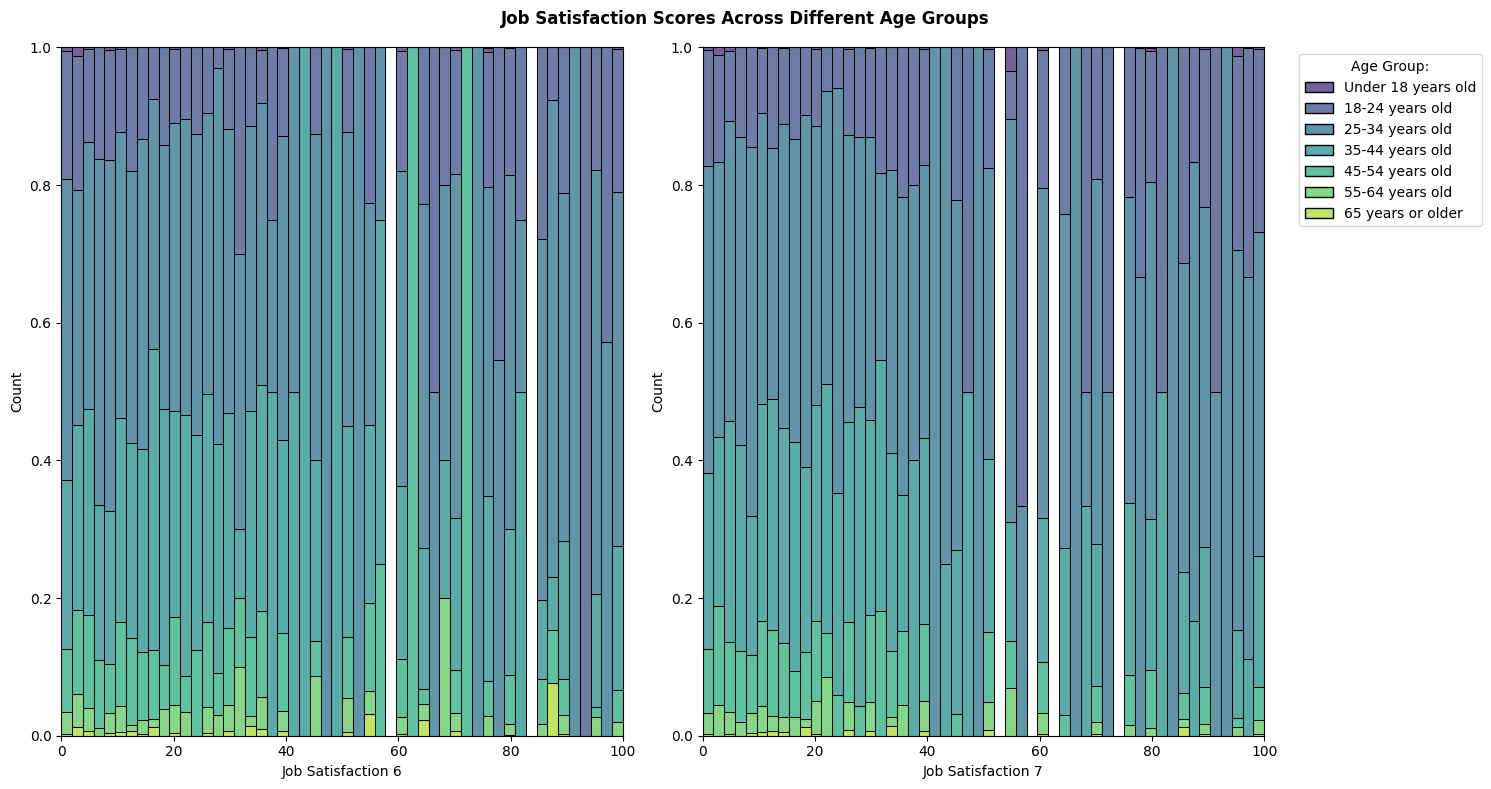

In [49]:
# Select Data
jobsat_age = df[df['Age'] != 'Prefer not to say'][['JobSatPoints_6', 'JobSatPoints_7', 'Age','Num_Age']].dropna().copy()

# Create Sub Plots
fig, ax = plt.subplots(1, 2, figsize=(15,8))

# JobSat6 Stacked Chart
sns.histplot(jobsat_age, x='JobSatPoints_6',hue='Age', multiple='fill', ax=ax[0],palette='viridis', element='bars', legend=False)
ax[0].set_xlabel("Job Satisfaction 6")

# JobSat7 Stacked Chart
sns.histplot(jobsat_age, x='JobSatPoints_7',hue='Age', multiple='fill', ax=ax[1], palette='viridis', element='bars')
ax[1].set_xlabel("Job Satisfaction 7")

# Adjust legend
sns.move_legend(
    ax[1],
    loc='upper left',
    bbox_to_anchor=(1.05,1),
    title="Age Group:"
)

# Adjust layout and set title
plt.suptitle("Job Satisfaction Scores Across Different Age Groups", fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

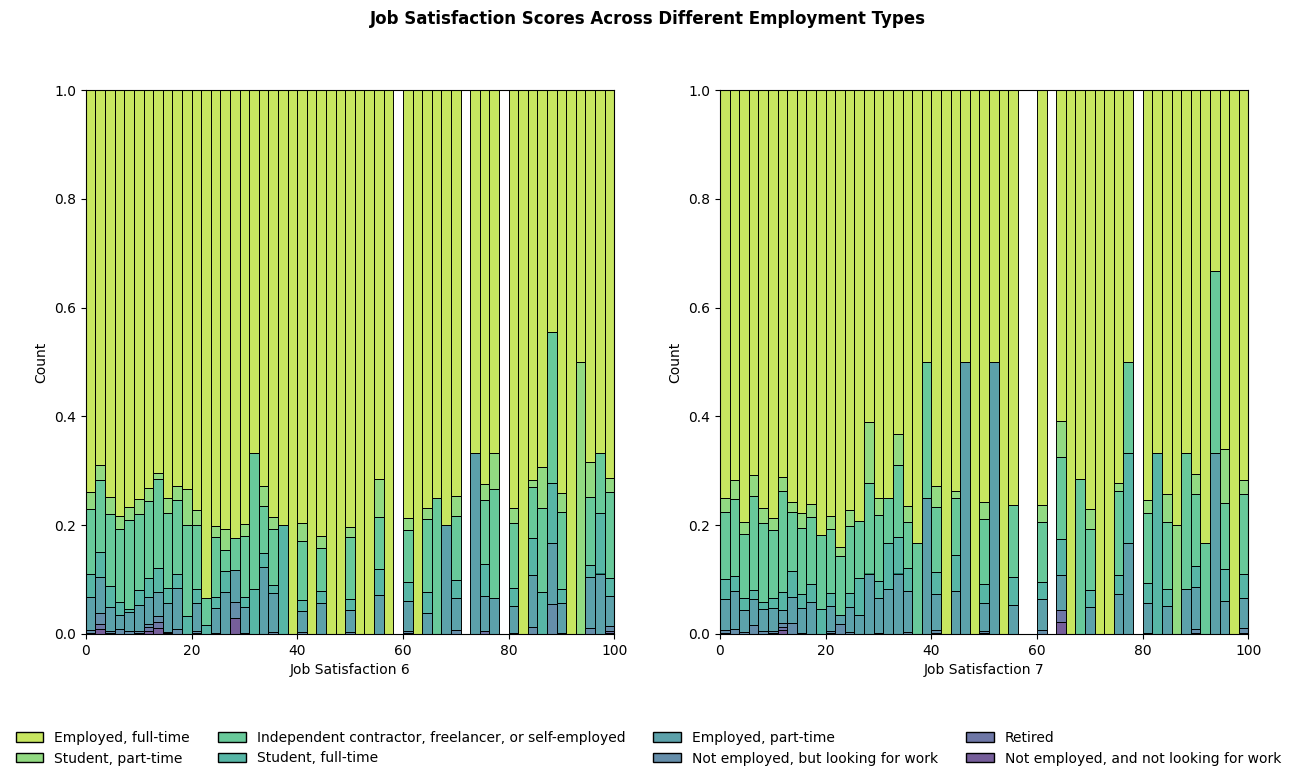

In [82]:
# Select Data
jobsat_emp = df[['JobSatPoints_6', 'JobSatPoints_7', 'Employment']].dropna().copy()

# Fix Employment values
jobsat_emp['emp'] = jobsat_emp['Employment'].str.split(';')
jobsat_explode = jobsat_emp.explode('emp')

# Create Sub Plots
fig, ax = plt.subplots(1, 2, figsize=(15,8))

# JobSat6 Stacked Chart
sns.histplot(jobsat_explode, x='JobSatPoints_6', hue='emp', multiple='fill', 
             ax=ax[0], palette='viridis_r', element='bars', legend=False)
ax[0].set_xlabel("Job Satisfaction 6")

# JobSat7 Stacked Chart
sns.histplot(jobsat_explode, x='JobSatPoints_7', hue='emp', multiple='fill', 
             ax=ax[1], palette='viridis_r', element='bars') # Keep legend for now
ax[1].set_xlabel("Job Satisfaction 7")

# --- THE FIX ---

# 1. Grab handles/labels BEFORE messing with layout
# Note: Sometimes histplot doesn't return handles easily. 
# We explicitly get the legend object first.
lines, labels = ax[1].get_legend_handles_labels()

# If that returns empty (common in some seaborn versions), try this fallback:
if not lines:
    lines = ax[1].get_legend().legend_handles
    labels = [t.get_text() for t in ax[1].get_legend().get_texts()]

# 2. Remove the subplot legend
if ax[1].get_legend():
    ax[1].get_legend().remove()
    

# 4. Adjust Bottom Margin SECOND (Creates the empty floor for the legend)
plt.subplots_adjust(bottom=0.2) # Increased to 0.2 to be safe

# 5. Add Global Legend
fig.legend(
    lines, labels,
    loc='lower center',
    bbox_to_anchor=(0.5, 0.02), # Lift it slightly off the absolute bottom
    ncol=4, # Adjust based on how many employment types you have
    frameon=False
)

plt.suptitle("Job Satisfaction Scores Across Different Employment Types", y=0.98, fontsize=12, fontweight='bold')
plt.show()